In [413]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn import preprocessing


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [414]:
# Load the wine dataset
winedf = pd.read_csv('/content/winequality-white.csv', header=0, sep=';', dtype={
    'fixed acidity': 'float64',
    'volatile acidity': 'float64',
    'citric acid': 'float64',
    'residual sugar': 'float64',
    'chlorides': 'float64',
    'free sulfur dioxide': 'float64',
    'total sulfur dioxide': 'float64',
    'density': 'float64',
    'pH': 'float64',
    'sulphates': 'float64',
    'alcohol': 'float64',
    'quality': 'int32',
})
print(winedf.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [415]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 440.2 KB


In [416]:
winedf.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int32
dtype: object

In [417]:
winedf.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [418]:
winedf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

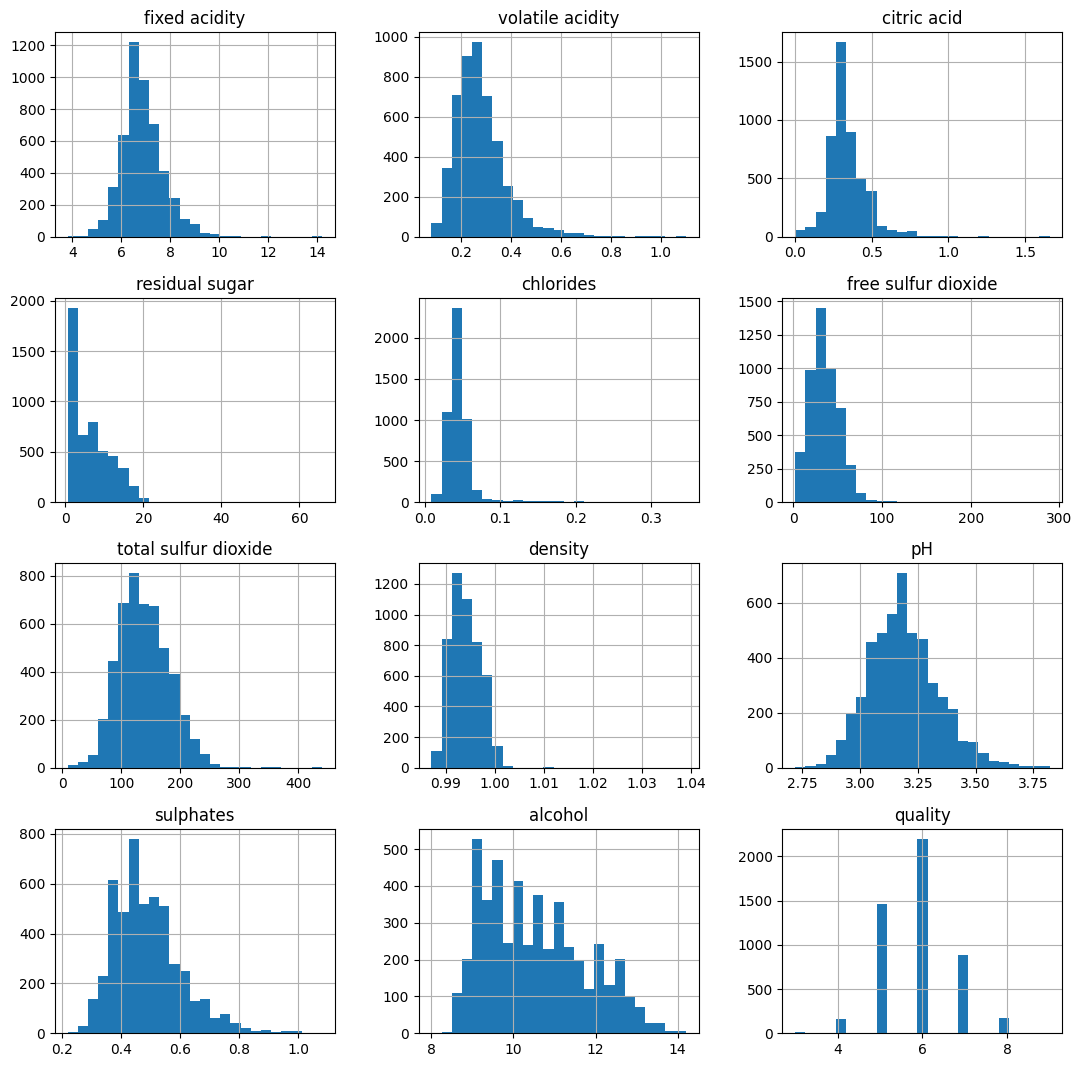

In [419]:
# Histogram to see distribution of features

winedf.hist(bins=25, figsize=(13, 13))

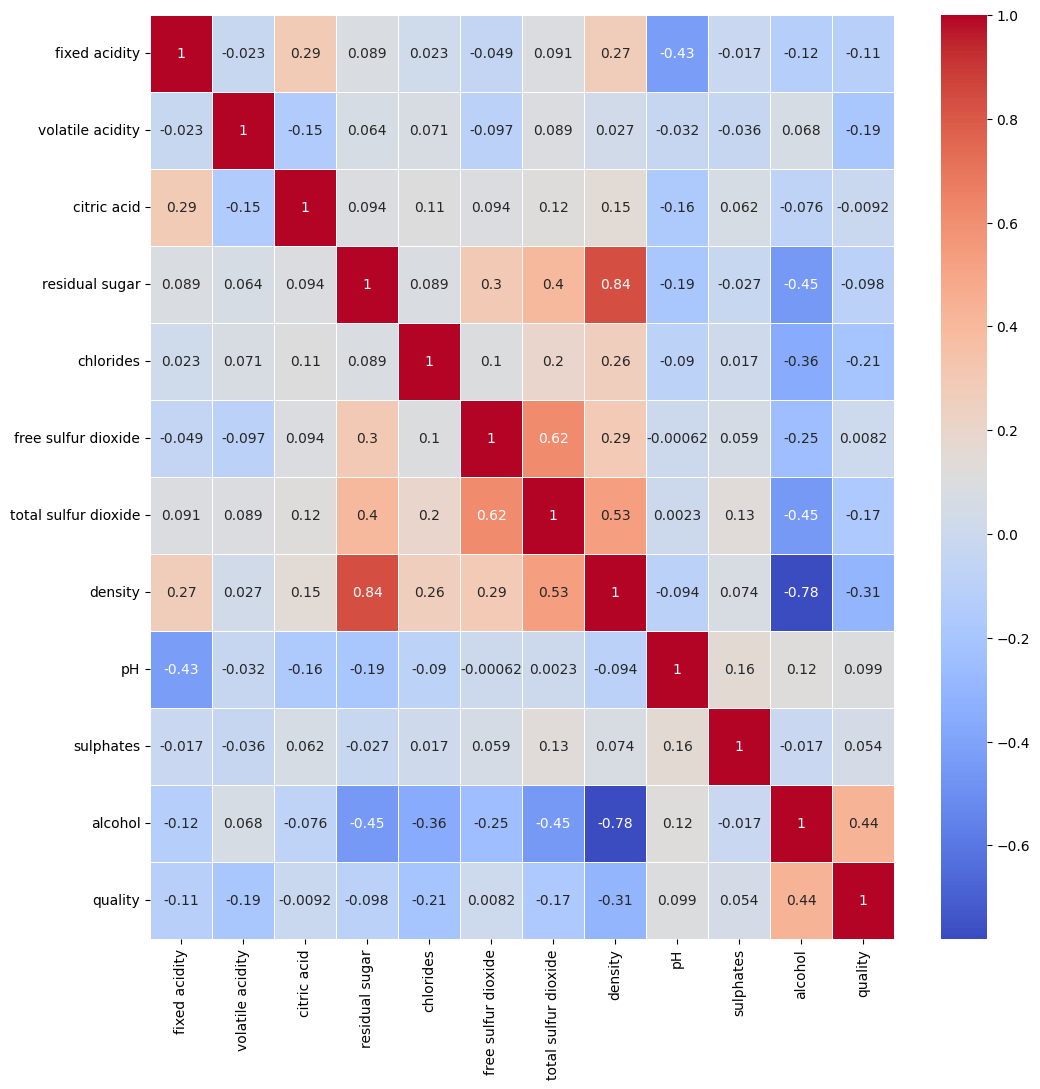

In [420]:
# Correlation heatmap looking for redundant features

plt.figure(figsize=(12, 12))
sb.heatmap(winedf.corr(), linewidths=0.5, annot=True, cmap="coolwarm")
plt.show()

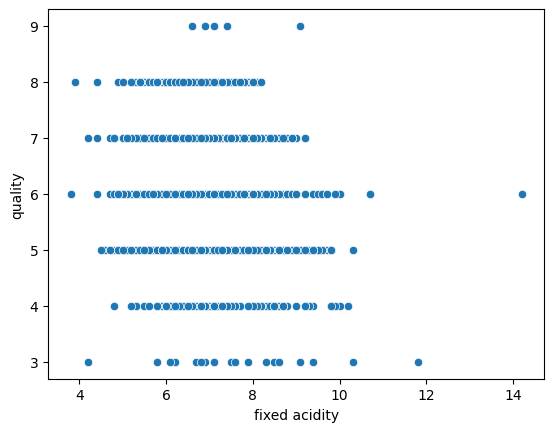

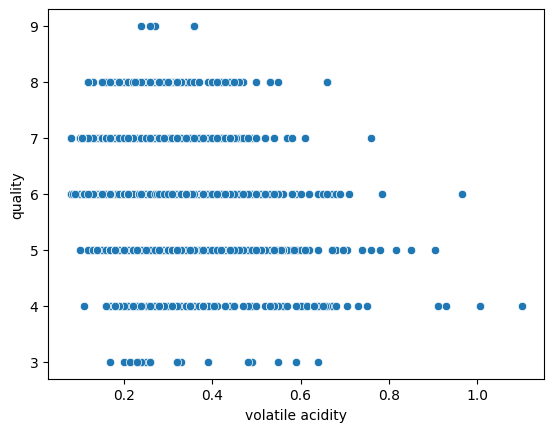

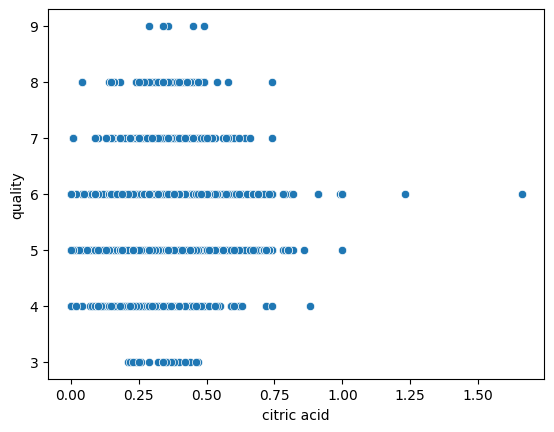

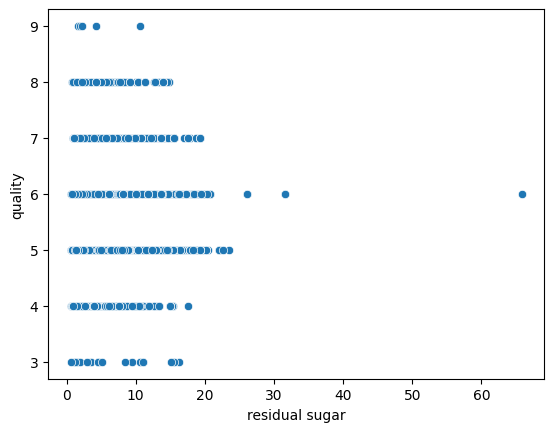

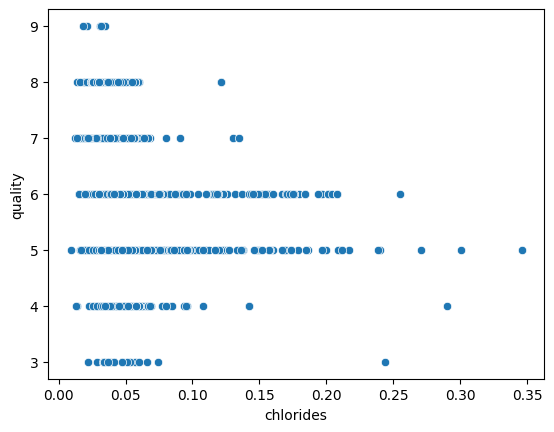

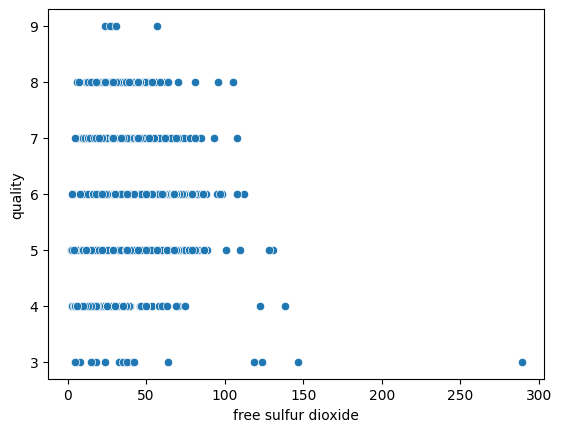

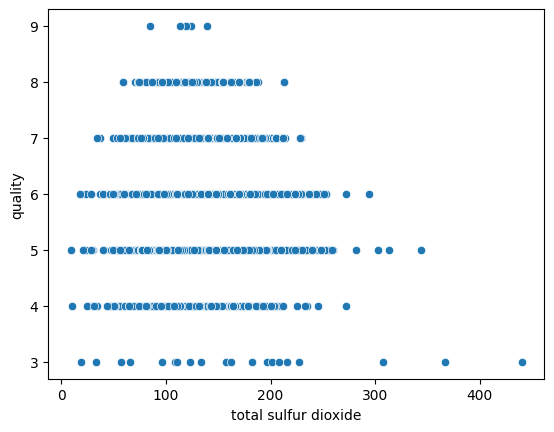

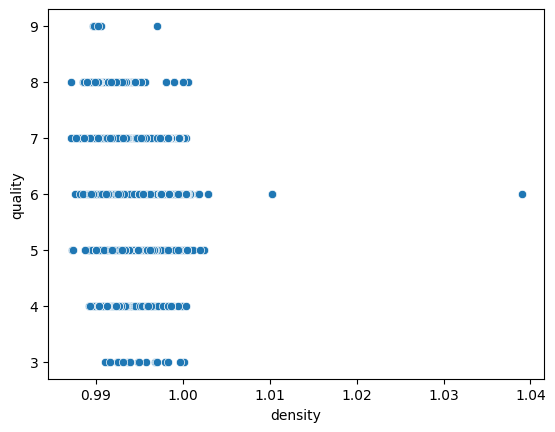

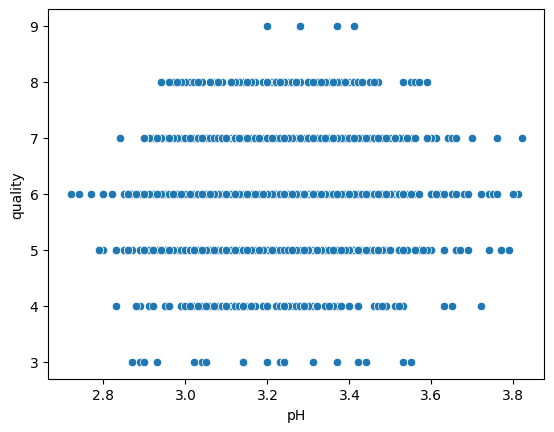

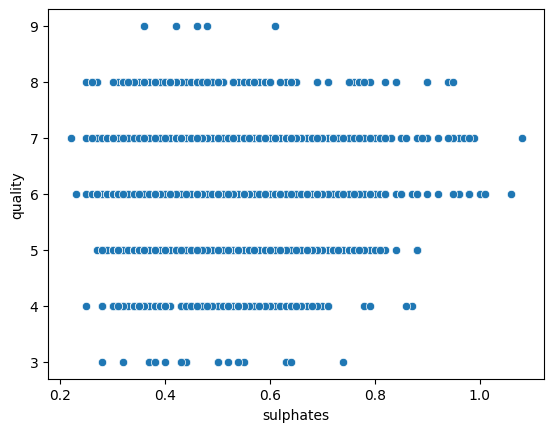

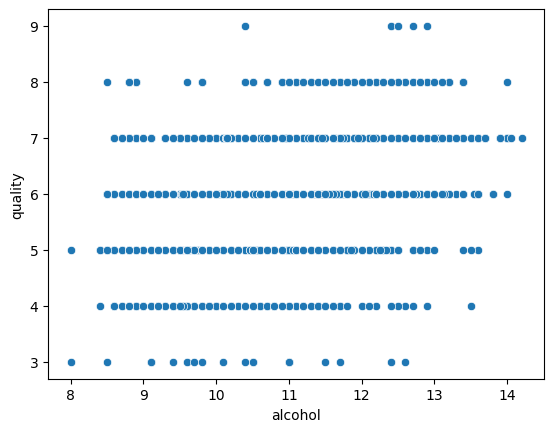

In [421]:
# Split Data then Scale it

X = winedf.drop('quality', axis=1)
Y = winedf['quality']

# Looking to see outliers
for feat in X.columns.to_list():
  sb.scatterplot(winedf, x=feat, y='quality')
  plt.show()

# and there are noticeable outliers so should use a scaler that is robust to those
# quantile transformer documentation makes it seem appropriate, but will also use standard scaler just to see
# if there is a difference

x_train, X_test, y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

stdScaler = preprocessing.StandardScaler()
qtScaler = preprocessing.QuantileTransformer()


x_trainStdScaled = pd.DataFrame(stdScaler.fit_transform(x_train), columns = x_train.columns)
x_trainQtScaled = pd.DataFrame(qtScaler.fit_transform(x_train), columns = x_train.columns)

# Train on standard
LRss = LinearRegression()
LRss.fit(x_trainStdScaled, y_train)

DTss = DecisionTreeRegressor(random_state=42)
DTss.fit(x_trainStdScaled, y_train)

RFss = RandomForestRegressor(random_state=42)
RFss.fit(x_trainStdScaled, y_train)

# Train on quantile

LRqt = LinearRegression()
LRqt.fit(x_trainQtScaled, y_train)

DTqt = DecisionTreeRegressor(random_state=42)
DTqt.fit(x_trainQtScaled, y_train)

RFqt = RandomForestRegressor(random_state=42)
RFqt.fit(x_trainQtScaled, y_train)

X_testStdScaled = pd.DataFrame(stdScaler.transform(X_test), columns = X_test.columns) #note: not fit_transforming again, I'm using the same as from training
X_testQtScaled = pd.DataFrame(qtScaler.transform(X_test), columns = X_test.columns)     # so not fitting scale on test data which should be unseen

# Test models

LRssPredict = LRss.predict(X_testStdScaled)
DTssPredict = DTss.predict(X_testStdScaled)
RFssPredict = RFss.predict(X_testStdScaled)

LRqtPredict = LRqt.predict(X_testQtScaled)
DTqtPredict = DTqt.predict(X_testQtScaled)
RFqtPredict = RFqt.predict(X_testQtScaled)

LRssCompare = pd.DataFrame({'Actual': Y_test, 'Predicted': LRssPredict})
DTssCompare = pd.DataFrame({'Actual': Y_test, 'Predicted': DTssPredict})
RFssCompare = pd.DataFrame({'Actual': Y_test, 'Predicted': RFssPredict})

LRssCompare['Difference'] = LRssCompare['Actual'] - LRssCompare['Predicted']
DTssCompare['Difference'] = DTssCompare['Actual'] - DTssCompare['Predicted']
RFssCompare['Difference'] = RFssCompare['Actual'] - RFssCompare['Predicted']

LRqtCompare = pd.DataFrame({'Actual': Y_test, 'Predicted': LRqtPredict})
DTqtCompare = pd.DataFrame({'Actual': Y_test, 'Predicted': DTqtPredict})
RFqtCompare = pd.DataFrame({'Actual': Y_test, 'Predicted': RFqtPredict})

LRqtCompare['Difference'] = LRqtCompare['Actual'] - LRqtCompare['Predicted']
DTqtCompare['Difference'] = DTqtCompare['Actual'] - DTqtCompare['Predicted']
RFqtCompare['Difference'] = RFqtCompare['Actual'] - RFqtCompare['Predicted']

absLRssDiff = LRssCompare.loc[:, 'Difference'].abs()
absDTssDiff = DTssCompare.loc[:, 'Difference'].abs()
absRFssDiff = RFssCompare.loc[:, 'Difference'].abs()

absLRqtDiff = LRqtCompare.loc[:, 'Difference'].abs()
absDTqtDiff = DTqtCompare.loc[:, 'Difference'].abs()
absRFqtDiff = RFqtCompare.loc[:, 'Difference'].abs()

# See how much each prediction was off by on average (absolute values) a bit more informative at least to me

In [422]:
absLRssDiff.describe()


count    980.000000
mean       0.586267
std        0.474917
min        0.001644
25%        0.251227
50%        0.491637
75%        0.794503
max        4.213810
Name: Difference, dtype: float64

In [423]:
absDTssDiff.describe()

count    980.000000
mean       0.481633
std        0.653950
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: Difference, dtype: float64

In [424]:
absRFssDiff.describe()

count    980.000000
mean       0.419531
std        0.415209
min        0.000000
25%        0.130000
50%        0.290000
75%        0.580000
max        2.900000
Name: Difference, dtype: float64

In [425]:
absLRqtDiff.describe()


count    980.000000
mean       0.584781
std        0.454839
min        0.000996
25%        0.248994
50%        0.505696
75%        0.792872
max        3.165965
Name: Difference, dtype: float64

In [426]:
absDTqtDiff.describe()

count    980.000000
mean       0.481633
std        0.653950
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: Difference, dtype: float64

In [427]:
absRFqtDiff.describe()

count    980.000000
mean       0.420092
std        0.416519
min        0.000000
25%        0.130000
50%        0.290000
75%        0.590000
max        2.890000
Name: Difference, dtype: float64

In [428]:
# Scores
print("Standard Scaler LinearRegression Training Accuracy: ",  LRss.score(x_trainStdScaled, y_train))
print("Standard Scaler DecisionTree Training Accuracy: ",  DTss.score(x_trainStdScaled, y_train))
print("Standard Scaler RandomForest Training Accuracy: ",  RFss.score(x_trainStdScaled, y_train))

print("\nStandard Scaler LinearRegression Testing Accuracy: ",  LRss.score(X_testStdScaled, Y_test), ", Mean Squared Error: ", mean_squared_error(Y_test, LRssPredict))
print("Standard Scaler DecisionTree Testing Accuracy: ",  DTss.score(X_testStdScaled, Y_test), ", Mean Squared Error: ", mean_squared_error(Y_test, DTssPredict))
print("Standard Scaler RandomForest Accuracy: ",  RFss.score(X_testStdScaled, Y_test), ", Mean Squared Error: ", mean_squared_error(Y_test, RFssPredict))

print("\n\nQuantile Scaler LinearRegression Training Accuracy: ",  LRqt.score(x_trainQtScaled, y_train))
print("Quantile Scaler DecisionTree Training Accuracy: ",  DTqt.score(x_trainQtScaled, y_train))
print("Quantile Scaler RandomForest Training Accuracy: ",  RFqt.score(x_trainQtScaled, y_train))

print("\nQuantile Scaler LinearRegression Testing Accuracy: ",  LRqt.score(X_testQtScaled, Y_test), ", Mean Squared Error: ", mean_squared_error(Y_test, LRqtPredict))
print("Quantile Scaler DecisionTree Testing Accuracy: ",  DTqt.score(X_testQtScaled, Y_test), ", Mean Squared Error: ", mean_squared_error(Y_test, DTqtPredict))
print("Quantile Scaler RandomForest Testing Accuracy: ",  RFqt.score(X_testQtScaled, Y_test), ", Mean Squared Error: ", mean_squared_error(Y_test, RFqtPredict))

# looks like quantile scaler improved test performance for LinearRegression model but not the other two

Standard Scaler LinearRegression Training Accuracy:  0.28431266263894317
Standard Scaler DecisionTree Training Accuracy:  1.0
Standard Scaler RandomForest Training Accuracy:  0.9313102128626115

Standard Scaler LinearRegression Testing Accuracy:  0.2652750042179155 , Mean Squared Error:  0.5690247717229254
Standard Scaler DecisionTree Testing Accuracy:  0.14886179692499635 , Mean Squared Error:  0.6591836734693878
Standard Scaler RandomForest Accuracy:  0.5503674032406387 , Mean Squared Error:  0.3482283673469388


Quantile Scaler LinearRegression Training Accuracy:  0.3025738840457113
Quantile Scaler DecisionTree Training Accuracy:  1.0
Quantile Scaler RandomForest Training Accuracy:  0.9316514147600251

Quantile Scaler LinearRegression Testing Accuracy:  0.29160103553386385 , Mean Squared Error:  0.5486359676861412
Quantile Scaler DecisionTree Testing Accuracy:  0.14886179692499635 , Mean Squared Error:  0.6591836734693878
Quantile Scaler RandomForest Testing Accuracy:  0.54835352592

[Text(0, 0, 'LinearRegression'),
 Text(1, 0, 'DecisionTree'),
 Text(2, 0, 'RandomForest')]

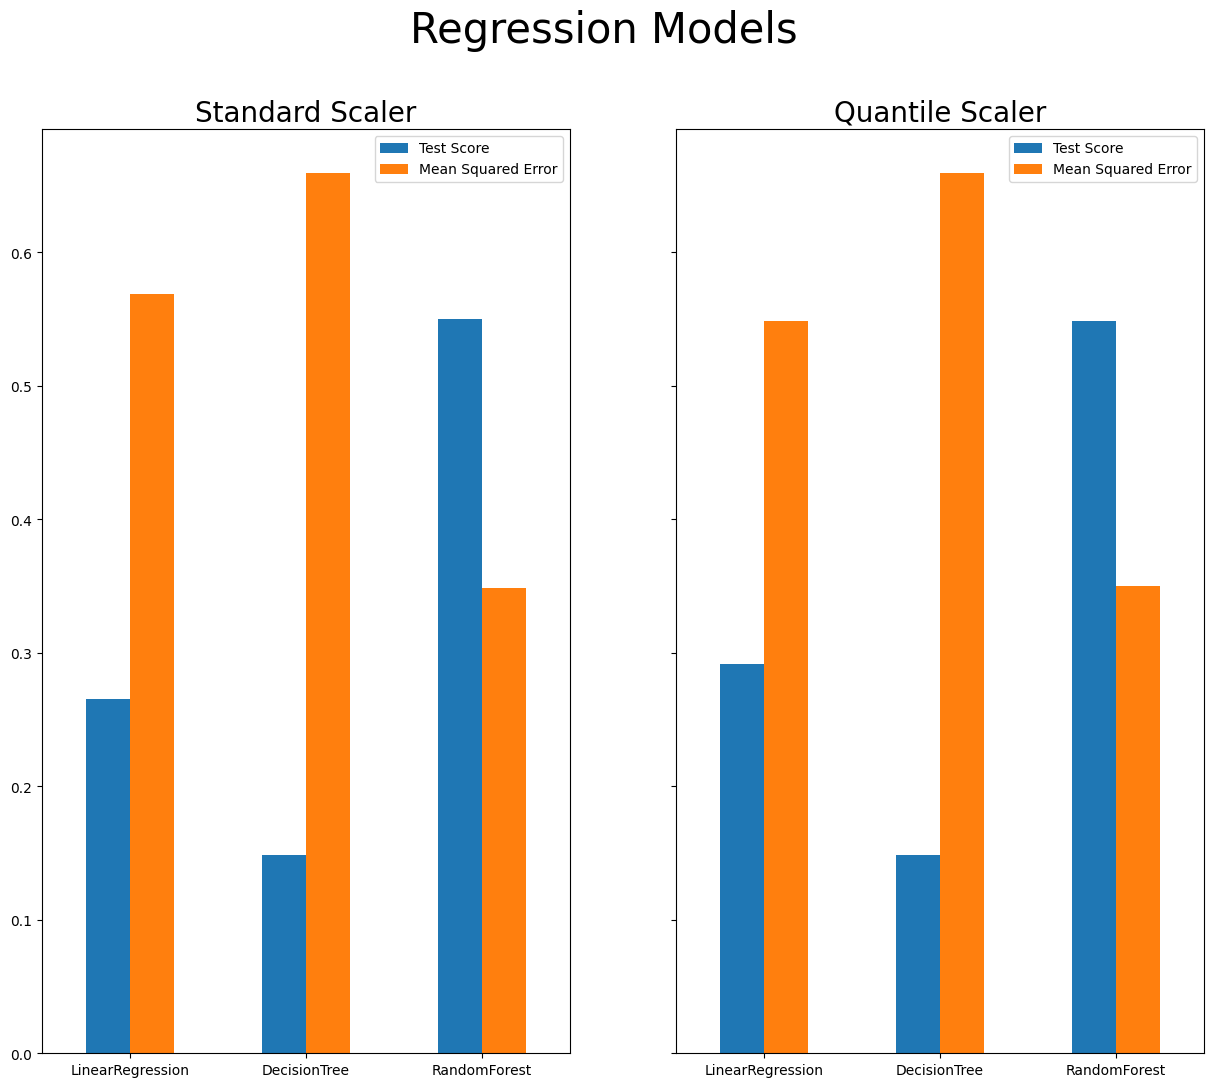

In [429]:
# Make a graph of scores

SSRegreScores = [[LRss.score(X_testStdScaled, Y_test), mean_squared_error(Y_test, LRssPredict)], [DTss.score(X_testStdScaled, Y_test), mean_squared_error(Y_test, DTssPredict)], [RFss.score(X_testStdScaled, Y_test), mean_squared_error(Y_test, RFssPredict)]]
QTRegreScores = [[LRqt.score(X_testQtScaled, Y_test), mean_squared_error(Y_test, LRqtPredict)], [DTqt.score(X_testQtScaled, Y_test), mean_squared_error(Y_test, DTqtPredict)], [RFqt.score(X_testQtScaled, Y_test), mean_squared_error(Y_test, RFqtPredict)]]

ssRegreScoresDf = pd.DataFrame(SSRegreScores, columns=['Test Score', 'Mean Squared Error'])
qtRegreScoresDf = pd.DataFrame(QTRegreScores, columns=['Test Score', 'Mean Squared Error'])

figRegreScores = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 12), sharey=True)
plt.suptitle('Regression Models', fontsize = 30)
figRegreScores[1][0].set_title('Standard Scaler', fontsize = 20)
figRegreScores[1][1].set_title('Quantile Scaler', fontsize = 20)
PltssRegreScoresDf = ssRegreScoresDf.plot(kind='bar', ax=figRegreScores[1][0])
PltssRegreScoresDf.set_xticklabels(['LinearRegression', 'DecisionTree', 'RandomForest'], rotation = 0)
PltqtRegreScoresDf = qtRegreScoresDf.plot(kind='bar', ax=figRegreScores[1][1])
PltqtRegreScoresDf.set_xticklabels(['LinearRegression', 'DecisionTree', 'RandomForest'], rotation = 0)


In [430]:
# Time for Classifiers
winedf2 = winedf
#winedf2['highQuality'] = [1 if x > 5 else 0 for x in winedf2.quality]     # If you uncomment these three lines, you can make it into a binary classification problem
#X2 = winedf2.drop(columns=['quality', 'highQuality'], axis=1)
#Y2 = winedf2['highQuality']

X2 = winedf2.drop(columns=['quality'], axis=1)  # If you comment out these two lines, you can make it into a binary classification problem
Y2 = winedf2['quality']

x_train2, X_test2, y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [431]:
# Scale data

stdScaler2 = preprocessing.StandardScaler()
qtScaler2 = preprocessing.QuantileTransformer()

x_train2StdScaled = pd.DataFrame(stdScaler2.fit_transform(x_train2), columns = x_train2.columns)
x_train2QtScaled = pd.DataFrame(qtScaler2.fit_transform(x_train2), columns = x_train2.columns)


# Train on standard scaler data
SVCss = SVC(random_state=42)
SVCss.fit(x_train2StdScaled, y_train2)

Logss = LogisticRegression(random_state=42, solver='lbfgs', max_iter=5000)
Logss.fit(x_train2StdScaled, y_train2)

DTCss = DecisionTreeClassifier(random_state=42)
DTCss.fit(x_train2StdScaled, y_train2)

KNNss = KNeighborsClassifier()
KNNss.fit(x_train2StdScaled, y_train2)

RFCss = RandomForestClassifier(random_state=42)
RFCss.fit(x_train2StdScaled, y_train2)

# Train on quantile scaler data

SVCqt = SVC(random_state=42)
SVCqt.fit(x_train2QtScaled, y_train2)

Logqt = LogisticRegression(random_state=42, solver='lbfgs', max_iter=5000)
Logqt.fit(x_train2QtScaled, y_train2)

DTCqt = DecisionTreeClassifier(random_state=42)
DTCqt.fit(x_train2QtScaled, y_train2)

KNNqt = KNeighborsClassifier()
KNNqt.fit(x_train2QtScaled, y_train2)

RFCqt = RandomForestClassifier(random_state=42)
RFCqt.fit(x_train2QtScaled, y_train2)

# Test models

X_test2StdScaled = pd.DataFrame(stdScaler2.transform(X_test2), columns = X_test2.columns) # reusing fit from train so no leaks
X_test2QtScaled = pd.DataFrame(qtScaler2.transform(X_test2), columns = X_test2.columns)

SVCssPredict = SVCss.predict(X_test2StdScaled)
LogssPredict = Logss.predict(X_test2StdScaled)
DTCssPredict = DTCss.predict(X_test2StdScaled)
KNNssPredict = KNNss.predict(X_test2StdScaled)
RFCssPredict = RFCss.predict(X_test2StdScaled)

SVCqtPredict = SVCqt.predict(X_test2QtScaled)
LogqtPredict = Logqt.predict(X_test2QtScaled)
DTCqtPredict = DTqt.predict(X_test2QtScaled)
KNNqtPredict = KNNqt.predict(X_test2QtScaled)
RFCqtPredict = RFCqt.predict(X_test2QtScaled)

SVCssCompare = pd.DataFrame({'Actual': Y_test2, 'Predicted': SVCssPredict})
LogssCompare = pd.DataFrame({'Actual': Y_test2, 'Predicted': LogssPredict})
DTCssCompare = pd.DataFrame({'Actual': Y_test2, 'Predicted': DTCssPredict})
KNNssCompare = pd.DataFrame({'Actual': Y_test2, 'Predicted': KNNssPredict})
RFCssCompare = pd.DataFrame({'Actual': Y_test2, 'Predicted': RFssPredict})

SVCssCompare['Difference'] = SVCssCompare['Actual'] - SVCssCompare['Predicted']
LogssCompare['Difference'] = LogssCompare['Actual'] - LogssCompare['Predicted']
DTCssCompare['Difference'] = DTCssCompare['Actual'] - DTCssCompare['Predicted']
KNNssCompare['Difference'] = KNNssCompare['Actual'] - KNNssCompare['Predicted']
RFCssCompare['Difference'] = RFCssCompare['Actual'] - RFCssCompare['Predicted']

SVCqtCompare = pd.DataFrame({'Actual': Y_test2, 'Predicted': SVCqtPredict})
LogqtCompare = pd.DataFrame({'Actual': Y_test2, 'Predicted': LogqtPredict})
DTCqtCompare = pd.DataFrame({'Actual': Y_test2, 'Predicted': DTqtPredict})
KNNqtCompare = pd.DataFrame({'Actual': Y_test2, 'Predicted': KNNqtPredict})
RFCqtCompare = pd.DataFrame({'Actual': Y_test2, 'Predicted': RFCqtPredict})

SVCqtCompare['Difference'] = SVCqtCompare['Actual'] - SVCqtCompare['Predicted']
LogqtCompare['Difference'] = LogqtCompare['Actual'] - LogqtCompare['Predicted']
DTCqtCompare['Difference'] = DTCqtCompare['Actual'] - DTCqtCompare['Predicted']
KNNqtCompare['Difference'] = KNNqtCompare['Actual'] - KNNqtCompare['Predicted']
RFCqtCompare['Difference'] = RFCqtCompare['Actual'] - RFCqtCompare['Predicted']

absSVCssDiff = SVCssCompare.loc[:, 'Difference'].abs()
absLogssDiff = LogssCompare.loc[:, 'Difference'].abs()
absDTCssDiff = DTCssCompare.loc[:, 'Difference'].abs()
absKNNssDiff = KNNssCompare.loc[:, 'Difference'].abs()
absRFCssDiff = RFCssCompare.loc[:, 'Difference'].abs()

absSVCqtDiff = SVCqtCompare.loc[:, 'Difference'].abs()
absLogqtDiff = LogqtCompare.loc[:, 'Difference'].abs()
absDTCqtDiff = DTCqtCompare.loc[:, 'Difference'].abs()
absKNNqtDiff = KNNqtCompare.loc[:, 'Difference'].abs()
absRFCqtDiff = RFCqtCompare.loc[:, 'Difference'].abs()


In [432]:
absSVCssDiff.describe()

count    980.000000
mean       0.489796
std        0.600390
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Difference, dtype: float64

In [433]:
absLogssDiff.describe()

count    980.000000
mean       0.538776
std        0.643603
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: Difference, dtype: float64

In [434]:
absDTCssDiff.describe()

count    980.000000
mean       0.478571
std        0.678391
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: Difference, dtype: float64

In [435]:
absKNNssDiff.describe()

count    980.000000
mean       0.523469
std        0.625031
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Difference, dtype: float64

In [436]:
absRFCssDiff.describe()

count    980.000000
mean       0.419531
std        0.415209
min        0.000000
25%        0.130000
50%        0.290000
75%        0.580000
max        2.900000
Name: Difference, dtype: float64

In [437]:
absSVCqtDiff.describe()

count    980.000000
mean       0.502041
std        0.603866
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Difference, dtype: float64

In [438]:
absLogqtDiff.describe()

count    980.000000
mean       0.533673
std        0.596113
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Difference, dtype: float64

In [439]:
absDTCqtDiff.describe()

count    980.000000
mean       0.481633
std        0.653950
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: Difference, dtype: float64

In [440]:
absKNNqtDiff.describe()

count    980.000000
mean       0.526531
std        0.658340
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: Difference, dtype: float64

In [441]:
absRFCqtDiff.describe()

count    980.000000
mean       0.346939
std        0.549901
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Difference, dtype: float64

In [442]:
#Scores

print("Standard Scaler SVC Training Accuracy: ", SVCss.score(x_train2StdScaled, y_train2))
print("Standard Scaler Logistic Regression Classifier Training Accuracy: ", Logss.score(x_train2StdScaled, y_train2))
print("Standard Scaler Decision Tree Classifier Training Accuracy: ", DTCss.score(x_train2StdScaled, y_train2))
print("Standard Scaler KNN Classifier Training Accuracy: ", KNNss.score(x_train2StdScaled, y_train2))
print("Standard Scaler Random Forest Classifier Training Accuracy: ", RFCss.score(x_train2StdScaled, y_train2))

print("\nStandard Scaler SVC Testing Accuracy: ", SVCss.score(X_test2StdScaled, Y_test2), ", Mean Squared Error: ", mean_squared_error(Y_test2, SVCssPredict))
print("Standard Scaler Logistic Regression Classifier Testing Accuracy: ", Logss.score(X_test2StdScaled, Y_test2), ", Mean Squared Error: ", mean_squared_error(Y_test2, LogssPredict))
print("Standard Scaler Decision Tree Classifier Testing Accuracy: ", DTCss.score(X_test2StdScaled, Y_test2), ", Mean Squared Error: ", mean_squared_error(Y_test2, DTCssPredict))
print("Standard Scaler KNN Classifier Testing Accuracy: ", KNNss.score(X_test2StdScaled, Y_test2), ", Mean Squared Error: ", mean_squared_error(Y_test2, KNNssPredict))
print("Standard Scaler Random Forest Classifier Testing Accuracy: ", RFCss.score(X_test2StdScaled, Y_test2), ", Mean Squared Error: ", mean_squared_error(Y_test2, RFCssPredict))


print("\n\nQuantile Scaler SVC Training Accuracy: ", SVCqt.score(x_train2QtScaled, y_train2))
print("Quantile Scaler Logistic Regression Classifier Training Accuracy: ", Logqt.score(x_train2QtScaled, y_train2))
print("Quantile Scaler Decision Tree Classifier Training Accuracy: ", DTCqt.score(x_train2QtScaled, y_train2))
print("Quantile Scaler KNN Classifier Training Accuracy: ", KNNqt.score(x_train2QtScaled, y_train2))
print("Quantile Scaler Random Forest Classifier Training Accuracy: ", RFCqt.score(x_train2QtScaled, y_train2))

print("\nQuantile Scaler SVC Testing Accuracy: ", SVCqt.score(X_test2QtScaled, Y_test2), ", Mean Squared Error: ", mean_squared_error(Y_test2, SVCqtPredict))
print("Quantile Scaler Logistic Regression Classifier Testing Accuracy: ", Logqt.score(X_test2QtScaled, Y_test2), ", Mean Squared Error: ", mean_squared_error(Y_test2, LogqtPredict))
print("Quantile Scaler Decision Tree Classifier Testing Accuracy: ", DTCqt.score(X_test2QtScaled, Y_test2), ", Mean Squared Error: ", mean_squared_error(Y_test2, DTCqtPredict))
print("Quantile Scaler KNN Classifier Testing Accuracy: ", KNNqt.score(X_test2QtScaled, Y_test2), ", Mean Squared Error: ", mean_squared_error(Y_test2, KNNqtPredict))
print("Quantile Scaler Random Forest Classifier Testing Accuracy: ", RFCqt.score(X_test2QtScaled, Y_test2), ", Mean Squared Error: ", mean_squared_error(Y_test2, RFCqtPredict))



Standard Scaler SVC Training Accuracy:  0.6207248596222562
Standard Scaler Logistic Regression Classifier Training Accuracy:  0.5472179683511996
Standard Scaler Decision Tree Classifier Training Accuracy:  1.0
Standard Scaler KNN Classifier Training Accuracy:  0.7046962736089841
Standard Scaler Random Forest Classifier Training Accuracy:  1.0

Standard Scaler SVC Testing Accuracy:  0.5612244897959183 , Mean Squared Error:  0.6
Standard Scaler Logistic Regression Classifier Testing Accuracy:  0.5316326530612245 , Mean Squared Error:  0.7040816326530612
Standard Scaler Decision Tree Classifier Testing Accuracy:  0.610204081632653 , Mean Squared Error:  0.6887755102040817
Standard Scaler KNN Classifier Testing Accuracy:  0.5428571428571428 , Mean Squared Error:  0.6642857142857143
Standard Scaler Random Forest Classifier Testing Accuracy:  0.6908163265306122 , Mean Squared Error:  0.4204081632653061


Quantile Scaler SVC Training Accuracy:  0.614854517611026
Quantile Scaler Logistic Regre

[Text(0, 0, 'SVC'),
 Text(1, 0, 'LogRegression'),
 Text(2, 0, 'DecisionTree'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'RandomForest')]

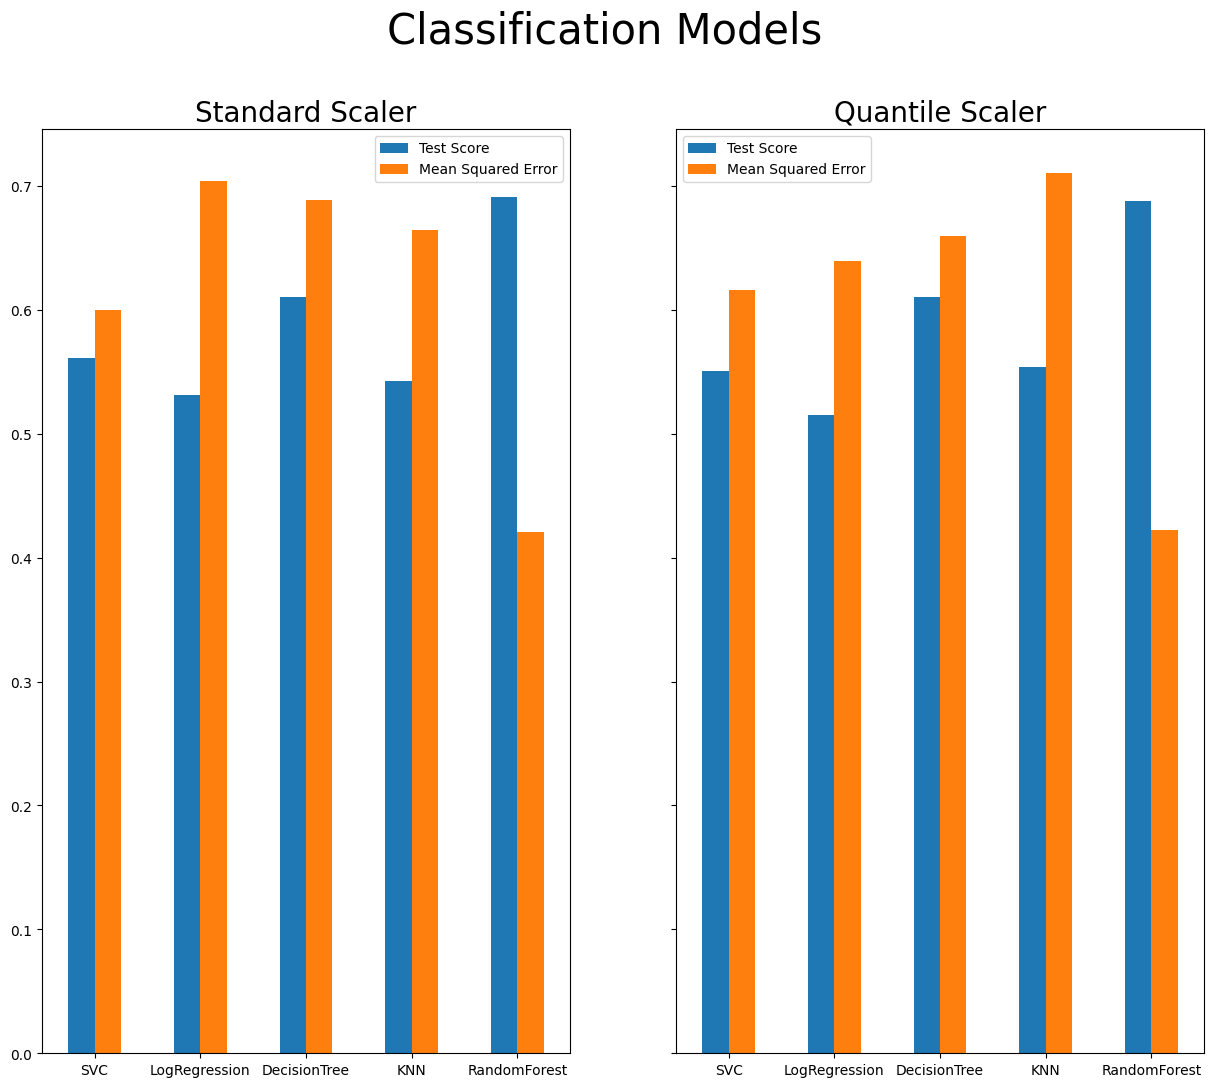

In [443]:
# Make a graph of scores

SSClassScores = [[SVCss.score(X_test2StdScaled, Y_test2), mean_squared_error(Y_test2, SVCssPredict)],
                 [Logss.score(X_test2StdScaled, Y_test2), mean_squared_error(Y_test2, LogssPredict)],
                 [DTCss.score(X_test2StdScaled, Y_test2), mean_squared_error(Y_test2, DTCssPredict)],
                 [KNNss.score(X_test2StdScaled, Y_test2), mean_squared_error(Y_test2, KNNssPredict)],
                 [RFCss.score(X_test2StdScaled, Y_test2), mean_squared_error(Y_test2, RFCssPredict)]]

QTClassScores = [[SVCqt.score(X_test2QtScaled, Y_test2), mean_squared_error(Y_test2, SVCqtPredict)],
                 [Logqt.score(X_test2QtScaled, Y_test2), mean_squared_error(Y_test2, LogqtPredict)],
                 [DTCqt.score(X_test2QtScaled, Y_test2), mean_squared_error(Y_test2, DTCqtPredict)],
                 [KNNqt.score(X_test2QtScaled, Y_test2), mean_squared_error(Y_test2, KNNqtPredict)],
                 [RFCqt.score(X_test2QtScaled, Y_test2), mean_squared_error(Y_test2, RFCqtPredict)]]

ssClassScoresDf = pd.DataFrame(SSClassScores, columns=['Test Score', 'Mean Squared Error'])
qtClassScoresDf = pd.DataFrame(QTClassScores, columns=['Test Score', 'Mean Squared Error'])

figClassScores = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 12), sharey=True)
plt.suptitle('Classification Models', fontsize = 30)
figClassScores[1][0].set_title('Standard Scaler', fontsize = 20)
figClassScores[1][1].set_title('Quantile Scaler', fontsize = 20)
PltssClassScoresDf = ssClassScoresDf.plot(kind='bar', ax=figClassScores[1][0])
PltssClassScoresDf.set_xticklabels(['SVC', 'LogRegression', 'DecisionTree', 'KNN', 'RandomForest'], rotation=0)
PltqtClassScoresDf = qtClassScoresDf.plot(kind='bar', ax=figClassScores[1][1])
PltqtClassScoresDf.set_xticklabels(['SVC', 'LogRegression', 'DecisionTree', 'KNN', 'RandomForest'], rotation=0)